### Ex.1

Вопрос 1: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра  от 0 до 1.

Чем меньше параметр alpha, тем меньше адаптивная способность модели - тем меньше учитывается ошибка прогноза для расчета нового члена временного ряда и последние актуальные данные временного ряда. При alpha = 0 адаптация отсутствует, прогноз равен начальному значению временного ряда. При увеличении alpha вес последних, свежих данных в прогнозе увеличивается, а при alpha = 1 прогноз временного ряда будет равен текущему значению временного ряда. 

### Ex. 2

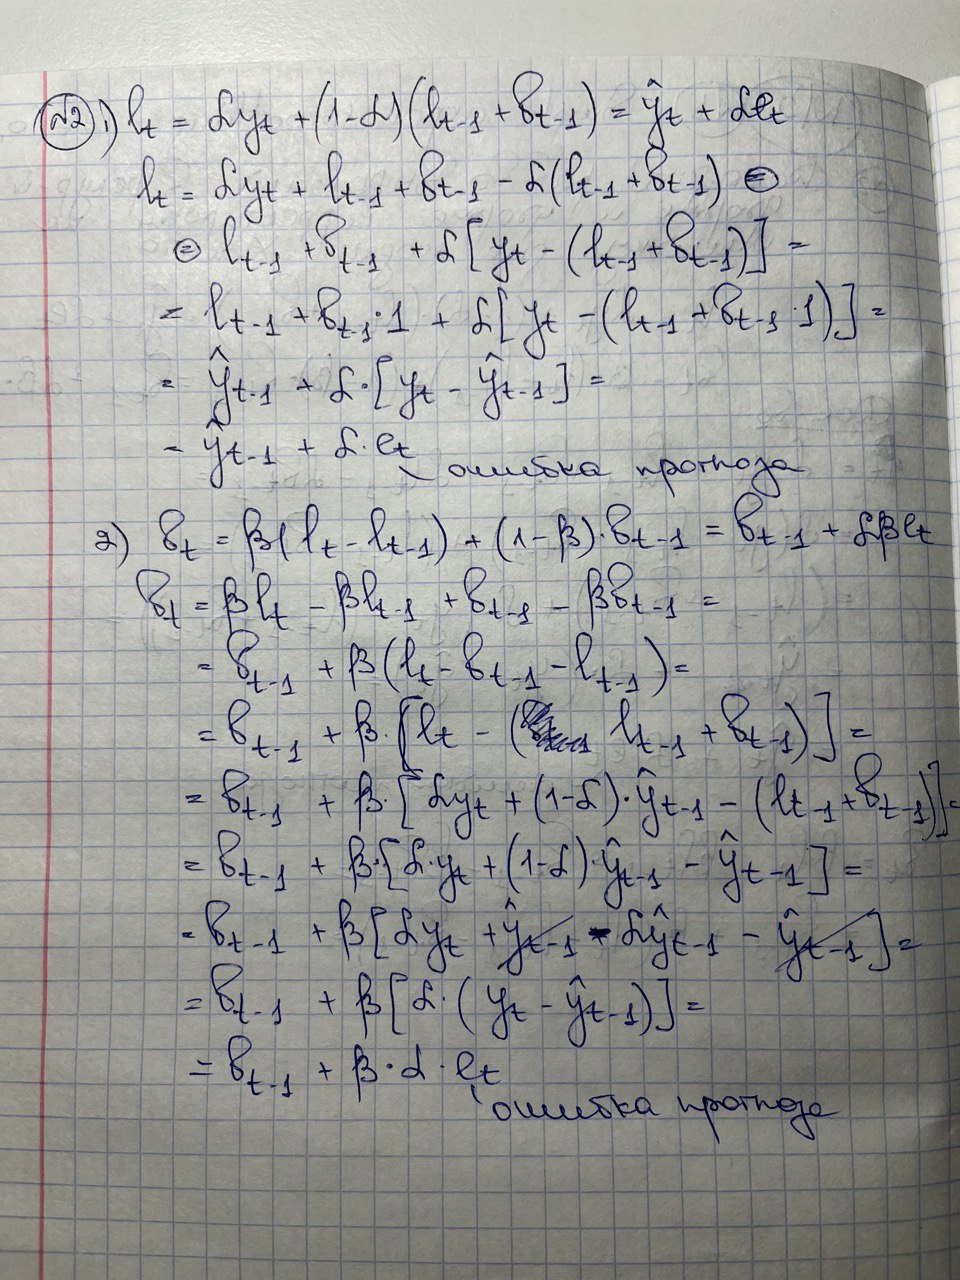

In [1]:
from IPython.display import Image
PATH = "Homework\HW1"
Image("ex2.jpg", width=700, height=700)

### Ex.3

Вопрос 3: Каким следует выбрать параметр сглаживания тренда  в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Если тренд временного ряда плавно меняется, подойдут малые alpha, 
так как исторические данные будут вполне отражать возрастающий тренд и фильтровать
(сглаживать) ошибки. При стохастически меняющемся тренде, нужные большие alpha,
чтобы успевать отражать тренд?


## Practice

### Ex.1 

In [1]:
import pandas as pd
import numpy as np
import math
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from lection_utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from lection_utils import qualityMAPE, SimpleExponentialSmoothing

%matplotlib inline

In [2]:
ts = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/energy_consump.csv', decimal='.', parse_dates=['Date'], dayfirst=False, index_col='Date')
ts = ts.sort_index()
ts.head(3)

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Date,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ex. 2 Build the Forecast with SES (20%)
#### Если я правильно поняла, то вторая строчка в поле таблицы Excel с заданием и временным рядом - это как раз столбец target с указанием временных рамок, которые и стоит рассматривать в ДЗ. Поэтому дальше используется именно этот таргет в обозначенных временных рамках

In [3]:
ts_crop = pd.DataFrame(ts[(ts['ZSP']=='FZSZOE27') & (ts['Hub']=='Center')]['2010-07-01':'2010-11-01']['EnergyConsump'])
ts_crop.head(3)

,EnergyConsump
Date,
2010-07-01,129260.119
2010-07-02,126256.804
2010-07-03,116780.200


##### SimpleExponentialSmoothing For timeSeries

In [4]:
# Function to calculate forecast with defined alpha

def ts_ses(ts, target, alpha, h=1):
    T = ts.shape[0] # the length of ts
    forecast =  [np.NaN]*(T+h)
    if alpha > 1:
        w.warn('Alpha can not be more than 1')
    if alpha<0:
        w.warn('Alpha can not be less than 0')
    y = ts[target][0] # инициализация первым значением ts
    for idx in range(T):
        if not math.isnan(ts[target][idx]):   # если не нан значение под индексом idx
            if math.isnan(y):     # если записанный y = nan 
                y = ts[target][idx]
            y = alpha * ts[target][idx] + (1-alpha)*y 
        forecast[idx+h] = y
    return forecast 

In [46]:
# Fuction to add calculated forecast to DataFrame

def add_forecast_df(ts, target, alpha_list, h=1):
    start = ts.index[0]
    end = ts.index[-1]
    ts_forecast = pd.DataFrame(index = pd.date_range(start, end+timedelta(days=h)))
    for i, alpha in enumerate(alpha_list):
        ts_forecast[alpha] = ts_ses(ts, target, alpha, h)
    return ts_forecast

#### Ex. 2.0 Forecast the ts with SES alpha = 0.1

In [47]:
new_forecast = add_forecast_df(ts_crop, 'EnergyConsump', [0.1], h=1)
new_forecast.head(3)

,0.1
2010-07-01,NaN
2010-07-02,129260.1190
2010-07-03,128959.7875


In [48]:
def plotTSForecast(ts, frc_ts, ts_num=0, alg_title=''):
    frc_ts.columns = ts.columns+'; '+alg_title
    ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
    ax = frc_ts[frc_ts.columns[ts_num]].plot(style='r-^', figsize=(25,5), linewidth=1.0)
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    return ax

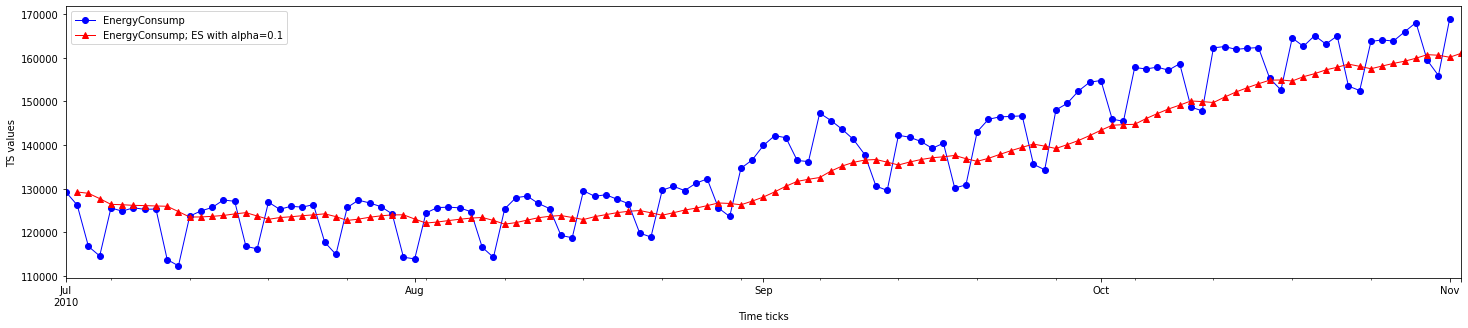

In [49]:
plotTSForecast(ts_crop, new_forecast, alg_title='ES with alpha=0.1');

#### Ex. 2.1 Split the ts to 4 equal parts: find the best param  of SES for the based on 3-rd part of ts 

In [50]:
ts_1 = ts_crop['2010-07-01':'2010-08-01']
ts_2 = ts_crop['2010-08-01':'2010-09-01']
ts_3 = ts_crop['2010-09-01':'2010-10-01'] # третья часть временного ряда 
ts_4 = ts_crop['2010-10-01':'2010-11-01']

In [51]:
def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures, x - real values, y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() 

In [52]:
params = {'alpha': [0.9, 0.8, 0.7, 0.4, 0.2, 0.15, 0.1, 0.05, 0.01]}
optimal_alpha_forecast = add_forecast_df(ts_3, 'EnergyConsump', params['alpha'])

quality = pd.DataFrame(index=['QualMAPE'],columns= optimal_alpha_forecast.columns)
for column in optimal_alpha_forecast.columns:
    quality[column] = qualityMAPE(ts_3['EnergyConsump'],optimal_alpha_forecast[column][:-1])   

In [127]:
print('Минимальное значение ошибки: ', quality.values[0].min())

Минимальное значение ошибки:  0.028044088143511715


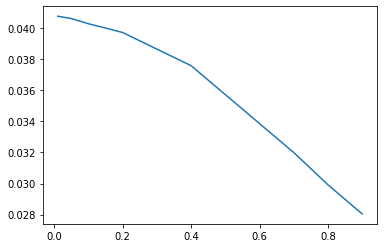

In [54]:
plt.plot(quality.columns.values, quality.values.reshape(9, 1));

Получилось, что оптимальное значение alpha близко к 1 - ошибка при данном значении является минимальной.

#### Ex. 2.2 Draw the forecast that correspond to SES with optimial value  Conclude whether SES can be used for this TS? If can not than explain why.

In [55]:
alpha_forecast_all = add_forecast_df(ts_crop, 'EnergyConsump', [0.9], 1)

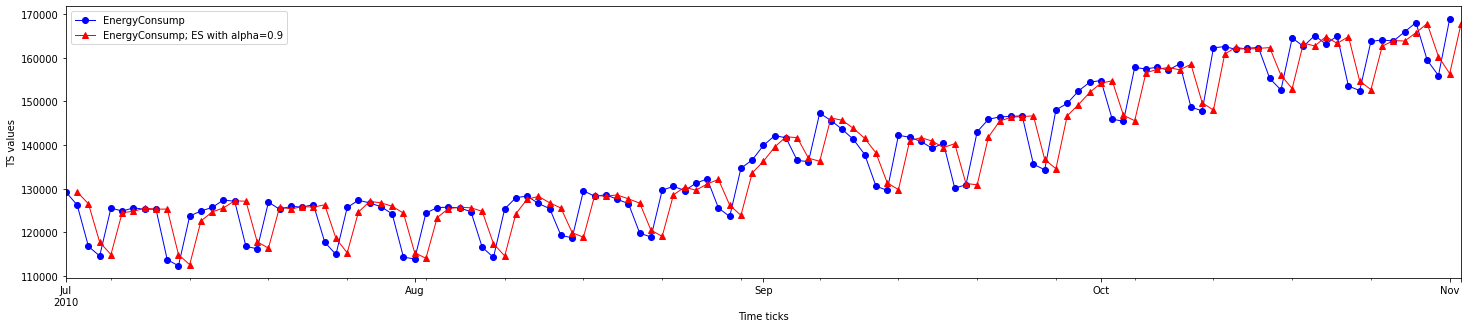

In [56]:
plotTSForecast(ts_crop, alpha_forecast_all, alg_title='ES with alpha=0.9');

Мне кажется, данный прогноз хоть и имеет наименьшую ошибку, но не является адекватным. Хоть прогноз быстро реагирует и изменяется при данном коэффициенте alpha=0.9, падения, которые кажутся вполне объяснимыми (потребление энергии в выходные дни), данный прогноз не ловит. Также данная модель не справится с долгосрочным прогнозом (при h>1), так как данным методом мы не поймаем тренд на повышение потребления энергии к зиме, если будем прогнозировать этим способом на долгий отрезок времени вперед.

#### Ex. 2.3 Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

Я не очень поняла формулировку задания, то ли нужно посчитать снова оптимальный прогноз по другому участку TS, либо нужно применить уже найденный оптимальный прогноз к 4му отрезку, слова 'the best forecast of the ts based on 4-th part' мне не понятны. В итоге сделала так: применила оптимальный альфа к 4му отрезку ряда.

In [79]:
ts_4 = ts_crop['2010-10-01':'2010-11-01']

In [95]:
params = {'alpha': [0.9]}
quality_4 = pd.DataFrame(index=['QualMAPE'])
ts4_forecast = add_forecast_df(ts_4, 'EnergyConsump', [0.9])
quality_4 = qualityMAPE(ts_4['EnergyConsump'], ts4_forecast[0.9])  

In [97]:
quality_4

0.028250181802694976

In [102]:
print('Ошибка прогноза на ts_4 qualityMape:', round(quality_4, 4))

Ошибка прогноза на ts_4 qualityMape: 0.0283


## Ex. 3 Winters model for Additive Seasonality 

#### Ex. 3.1 Realize Additive Winters model

#### Возьму реализацию из лекции

In [104]:
def AdditiveWintersExponentialSmoothing(x, alpha, gamma, p, h):
    T = len(x)
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= []
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if len(s)==0:
                # looking in the future
                for i in range(p):
                    s.append(x[i])
            if cntr<p:
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*l # recurrent smoothing of level 
            else:
                s.append(gamma*(x[cntr]-l)+(1-gamma)*s[cntr-p])
                l = alpha*(x[cntr]-s[cntr-p])+(1-alpha)*l # recurrent smoothing of level 
                
        FORECAST[cntr+h] = l + s[cntr+h-(1+h//p)*p]
    return FORECAST

In [105]:
def add_forecast_df(ts, target, Params, h=1):
    start = ts.index[0]
    end = ts.index[-1]
    ts_forecast = pd.DataFrame(index = pd.date_range(start, end+timedelta(days=h)))
    alpha_list = Params['alpha']
    gamma_list = Params['gamma']
    p = Params['seasonality_period']

    for i, alpha in enumerate(alpha_list):
        for j, gamma in enumerate(gamma_list):
            ts_forecast['{}_{}'.format(alpha, gamma)] = AdditiveWintersExponentialSmoothing(ts[target], alpha, gamma, p, h)
    return ts_forecast

#### Ex. 3.2 find the best params  (smoothing of level) and  (smoothing of seasonality) for the based on 3-rd part of ts.
Возьму отрезок ts_3, который был рассмотрен ранее во второй части дз

In [106]:
ts_3.head(3)

,EnergyConsump
Date,
2010-09-01,139929.639
2010-09-02,142174.362
2010-09-03,141694.858


In [108]:
wint_params_array = {'alpha':np.linspace(0.01,1,10),
                     'gamma':np.linspace(0.01,1,10), 
                     'seasonality_period':7} 

winter_fc_ts_3 = add_forecast_df(ts_3, 'EnergyConsump', wint_params_array)
winter_fc_ts_3.head(3)

,0.01_0.01,0.01_0.12,0.01_0.23,0.01_0.34,0.01_0.45,0.01_0.56,0.01_0.67,0.01_0.78,0.01_0.89,0.01_1.0,...,1.0_0.01,1.0_0.12,1.0_0.23,1.0_0.34,1.0_0.45,1.0_0.56,1.0_0.67,1.0_0.78,1.0_0.89,1.0_1.0
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-02,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,280704.704610,...,142174.362,142174.362,142174.362,142174.362,142174.362,142174.362,142174.362,142174.362,142174.362,142174.362
2010-09-03,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,278839.897184,...,141694.858,141694.858,141694.858,141694.858,141694.858,141694.858,141694.858,141694.858,141694.858,141694.858


In [109]:
quality_winter = pd.DataFrame(index=['QualMAPE'],columns=winter_fc_ts_3.columns)
for column in winter_fc_ts_3.columns:
    quality_winter[column] = qualityMAPE(ts_3['EnergyConsump'],winter_fc_ts_3[column])  

In [110]:
quality_winter

,0.01_0.01,0.01_0.12,0.01_0.23,0.01_0.34,0.01_0.45,0.01_0.56,0.01_0.67,0.01_0.78,0.01_0.89,0.01_1.0,...,1.0_0.01,1.0_0.12,1.0_0.23,1.0_0.34,1.0_0.45,1.0_0.56,1.0_0.67,1.0_0.78,1.0_0.89,1.0_1.0
QualMAPE,0.839538,0.756826,0.683797,0.619799,0.56418,0.519879,0.48397,0.455954,0.436969,0.432294,...,0.016209,0.015218,0.015024,0.014874,0.014611,0.014696,0.014897,0.015465,0.016042,0.016557


In [111]:
min_col = np.argmin(quality_winter.values[0])
alpha_gamma = quality_winter.columns[min_col]
alpha_opt = alpha_gamma.split('_')[0]
gamma_opt = alpha_gamma.split('_')[1]

print('Оптимальные коэффициенты alpha, gamma из предположения наличия недельной сезонности:',
      alpha_opt,',', gamma_opt)
print('Минимальное значение ошибки:', round(quality_winter.values[0].min(), 4))

Оптимальные коэффициенты alpha, gamma из предположения наличия недельной сезонности: 1.0 , 0.45
Минимальное значение ошибки: 0.0146


#### Ex. 3.3 Draw the forecast that correspond optimal values  and  for the whole TS

In [112]:
ts_crop.head(3)

,EnergyConsump
Date,
2010-07-01,129260.119
2010-07-02,126256.804
2010-07-03,116780.200


In [113]:
optim_params = {'alpha':[1], 'gamma':[0.45], 'seasonality_period':7} 

opt_winter_fc = add_forecast_df(ts_crop, 'EnergyConsump', optim_params)
opt_winter_fc.head(3)

,1_0.45
2010-07-01,NaN
2010-07-02,126256.804
2010-07-03,116780.200


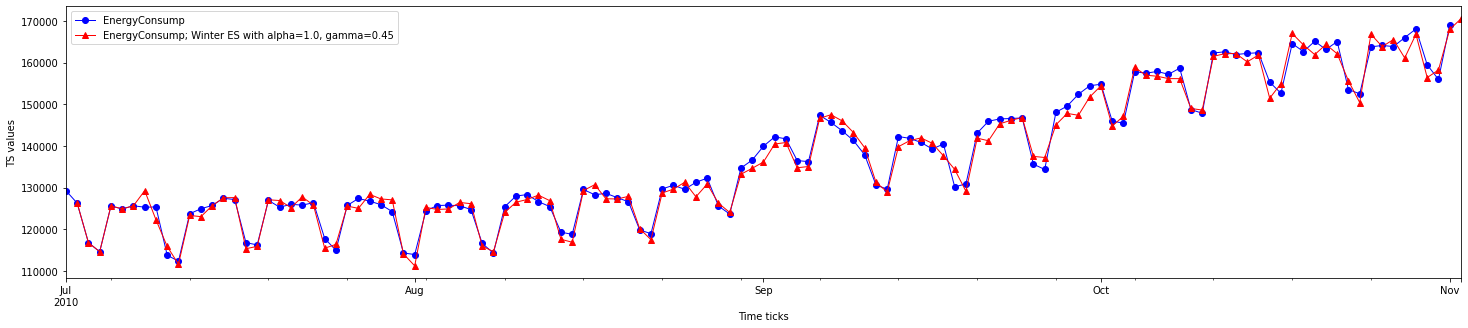

In [114]:
plotTSForecast(ts_crop, opt_winter_fc, alg_title='Winter ES with alpha=1.0, gamma=0.45');

#### Ex. 3.4 Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better?

In [115]:
winter_fc_ts_4 = add_forecast_df(ts_4, 'EnergyConsump', optim_params)
winter_fc_ts_4.head(3)

,1_0.45
2010-10-01,NaN
2010-10-02,145955.474
2010-10-03,145460.823


In [116]:
quality_winter_ts4 = pd.DataFrame(index=['QualMAPE'], columns=winter_fc_ts_4.columns)
for column in winter_fc_ts_4.columns:
    quality_winter_ts4[column] = qualityMAPE(ts_4['EnergyConsump'],winter_fc_ts_4[column])  

In [117]:
quality_winter_ts4

,1_0.45
QualMAPE,0.009635


In [119]:
min_col = np.argmin(quality_winter_ts4.values[0])
min_error = round(quality_winter_ts4.values[0].min(), 5)
alpha_gamma = quality_winter_ts4.columns[min_col]
min_error, alpha_gamma
print('Значение ошибки оптимального прогноза на 4м отрезке временного ряда=', min_error)

Значение ошибки оптимального прогноза на 4м отрезке временного ряда= 0.00964


In [123]:
print('Ошибка прогноза SES на ts_4:', round(quality_4, 4))
print('Ошибка Winter ES:', min_error)

Ошибка прогноза SES на ts_4: 0.0283
Ошибка Winter ES: 0.00964


Получается, что ошибка прогноза по модели Winter с учетом сезонности меньше, чем ошибка для SES. Прогнозу удалось поймать сезонные изменения потребления электроэнергии лучше.

#### Ex. 3.5 Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

На мой взгляд, данная модель хорошо описывает данный временной ряд, вместе с сезонными изменениями (недельной сезонностью), gamma достаточно мал, значит, в целом историческая сезонность повторяется из недели в неделю. Минимальная ошибка прогноза в случае SES была 0.0280, в то время как для модели Winter - 0.00964, что почти в 3 раза меньше

## Ex.4 Theil-Wage model for TS with linear trend and seasonality 

#### 4.1 Realize Theil-Wage model


In [129]:
def TWExponentialSmoothing(x, h, alpha, beta, gamma, p):
    T = len(x)
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    b=np.NaN
    s= []
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if math.isnan(b):
                b= 0     
            if len(s)==0:
                for i in range(p):
                    s.append(x[i])          
                    
            if cntr<p:
                l_old=l
                l = alpha*(x[cntr]-s[cntr])+(1-alpha)*(l+b)
                b=beta*(l-l_old)+(1-beta)*b
            else:
                l_old=l
                s.append(gamma*(x[cntr]-l)+(1-gamma)*s[cntr-p])
                l = alpha*(x[cntr]-s[cntr-p])+(1-alpha)*(l+b) # recurrent smoothing of level 
                b=beta*(l-l_old)+(1-beta)*b
            
        FORECAST[cntr+h] = l+b + s[cntr+h - (1+h//p)*p]
    return FORECAST

In [131]:
def add_tw_fc(ts, target, Params, h=1):
    start = ts.index[0]
    end = ts.index[-1]
    ts_forecast = pd.DataFrame(index = pd.date_range(start, end+timedelta(days=h)))
    alpha_list = Params['alpha']
    beta_list = Params['beta']
    gamma_list = Params['gamma']
    p = Params['seasonality_period']

    for alpha in alpha_list:
        for gamma in gamma_list:
            for beta in beta_list:
                ts_forecast['{}_{}_{}'.format(alpha,beta,gamma)] = TWExponentialSmoothing(ts[target], h, alpha, beta, gamma, p)
    return ts_forecast

In [132]:
tw_params_array = {'alpha':np.linspace(0.01,1,10),
                   'beta':np.linspace(0.01,1,10), 
                   'gamma':np.linspace(0.01,1,10), 
                   'seasonality_period':7} 

In [133]:
tw_ts_fc = add_tw_fc(ts_3, 'EnergyConsump', tw_params_array)
tw_ts_fc.head(3)

C:\Users\obars\AppData\Local\Temp/ipykernel_29176/1972638780.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ts_forecast['{}_{}_{}'.format(alpha,beta,gamma)] = TWExponentialSmoothing(ts[target], h, alpha, beta, gamma, p)


,0.01_0.01_0.01,0.01_0.12_0.01,0.01_0.23_0.01,0.01_0.34_0.01,0.01_0.45_0.01,0.01_0.56_0.01,0.01_0.67_0.01,0.01_0.78_0.01,0.01_0.89_0.01,0.01_1.0_0.01,...,1.0_0.01_1.0,1.0_0.12_1.0,1.0_0.23_1.0,1.0_0.34_1.0,1.0_0.45_1.0,1.0_0.56_1.0,1.0_0.67_1.0,1.0_0.78_1.0,1.0_0.89_1.0,1.0_1.0_1.0
2010-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-02,280690.711646,280536.789043,280382.866440,280228.943837,280075.021234,279921.098632,279767.176029,279613.253426,279459.330823,279305.408220,...,140775.065610,125382.805320,109990.545030,94598.284740,79206.024450,63813.76416,48421.503870,33029.243580,17636.983290,2244.723
2010-09-03,278798.199551,278339.710294,277881.559666,277423.747668,276966.274300,276509.139562,276052.343453,275595.885974,275139.767125,274683.986906,...,140309.554574,126918.288122,116913.318933,110294.647008,107062.272348,107216.19495,110756.414817,117682.931948,127995.746342,141694.858


In [134]:
quality_tw = pd.DataFrame(index=['QualMAPE'], 
                          columns=tw_ts_fc.columns)
for column in tw_ts_fc.columns:
    quality_tw[column] = qualityMAPE(ts_3['EnergyConsump'], 
                                     tw_ts_fc[column])  

In [147]:
quality_tw.values[0].min()

0.018759796324258168

In [136]:
print('Минимальная ошибка при подборе оптимальных коэффициентов:', 
      round(quality_tw.values.min(), 4))

Минимальная ошибка при подборе оптимальных коэффициентов: 0.0188


In [137]:
alpha_beta_gamma = quality_tw.columns[np.argmin(quality_tw.values)]
print('Оптимальные коэффициенты alpha, beta, gamma:')
for x in alpha_beta_gamma.split('_'): print(x, end=', ')

Оптимальные коэффициенты alpha, beta, gamma:
1.0, 0.01, 0.34, 

#### 4.3 Draw forecast with optimal values

In [138]:
opt_params={'alpha':[1], 'beta':[0.01], 'gamma':[0.34], 'seasonality_period':7}
tw_ts_optfc = add_tw_fc(ts_crop, 'EnergyConsump', opt_params)
tw_ts_optfc.head(3)

,1_0.01_0.34
2010-07-01,NaN
2010-07-02,124964.202810
2010-07-03,115500.524822


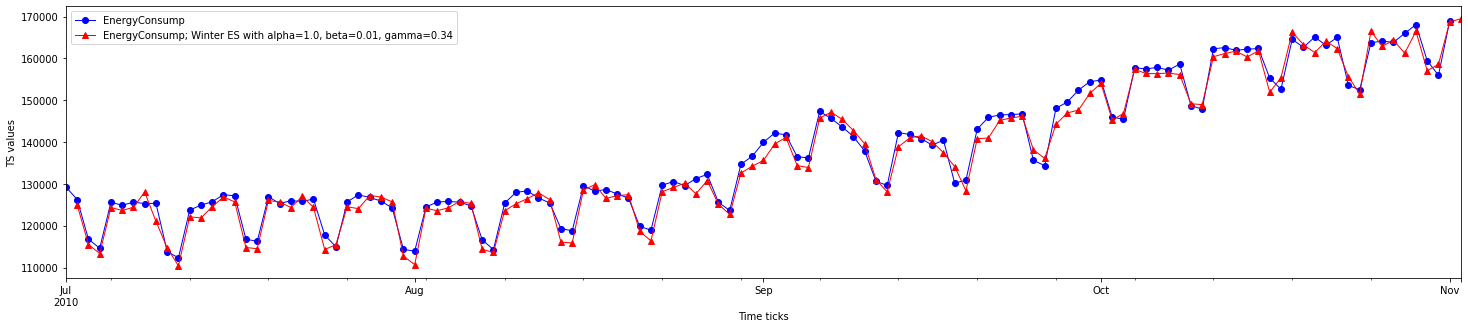

In [143]:
plotTSForecast(ts_crop, tw_ts_optfc, alg_title='Winter ES with alpha=1.0, beta=0.01, gamma=0.34');

#### Ex. 4.4 Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.  Compare it with accuracy of Additive Winters model: is it better than the last one?

In [140]:
opt_params={'alpha':[1], 'beta':[0.01], 'gamma':[0.34], 'seasonality_period':7}
tw_ts4_opt = add_tw_fc(ts_4, 'EnergyConsump', opt_params)
tw_ts4_opt.head(3)

,1_0.01_0.34
2010-10-01,NaN
2010-10-02,144407.390950
2010-10-03,143928.220781


In [145]:
quality_tw_4 = qualityMAPE(ts_4['EnergyConsump'], 
                           tw_ts4_opt['1_0.01_0.34']) 
print('Посчитанная на 4м отрезке временного ряда ошибка', round(quality_tw_4, 4))

Посчитанная на 4м отрезке временного ряда ошибка 0.0125


Ошибка метода Theil-Wage в случае ts_3 выше (0.01876), чем для прогноза по модели винтера (0.0146), хоть и не значительно. Для отрезка ts_4 ошибка Theil-Wage = 0.0125, Winter = 0.00964. Получается, метод Winter оба этих отрезка временного ряда описывает лучше, чем модель Theil_Wage.